In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

Загрузили датасет

In [2]:
df = pd.read_csv('./mushrooms.csv')

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [4]:
df.shape

(8124, 23)

Проверяем типы даннх и пропуски

In [5]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [6]:
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

### Общая информация о дата сете (представленно описание основных свойст грибов):

Информация об атрибутах: 

Классы: съедобные=e, ядовитые=p

Форма колпачка: колокол=b,конический=c,выпуклый=x,плоский=f, шишковатый=k,затонувший=s

поверхность крышки: волокнистая=f,канавки=g,чешуйчатая=y,гладкая=s

Цвет кепки: коричневый=n,буфф=b,корица=c,серый=g,зеленый=r,розовый=p,фиолетовый=u,красный=e,белый=w,желтый=y

Ушибы: ушибы=t,нет=f

Запах: миндаль=a,анис=l,креозот=c,рыбный=y,противный=f,затхлый=m,нет=n,острый=p,пряный=s

Насадка на жабры: прикреплена=a,по убыванию=d,свободна=f,зазубрена=n

Расстояние между жабрами: близко=c,многолюдно=w,далеко=d

Размер жабр: широкий=b,узкий=n

Цвет жабр: черный=k,коричневый=n,бурый=b,шоколадный=h,серый=g, зеленый=r,оранжевый=o,розовый=p,фиолетовый=u,красный=e,белый=w,желтый=y

Форма стебля: увеличивающийся=e,сужающийся=t

Стебель-корень: луковичный=b,клубный=c,чашечка=u,равный=e,ризоморфы=z,корневой=r,отсутствует=?

Поверхность стебля над кольцом: волокнистая=f,чешуйчатая=y,шелковистая=k,гладкая=s

Поверхность стебля под кольцом: волокнистая=f,чешуйчатая=y,шелковистая=k,гладкая=s

Цвет стебля над кольцом: коричневый=n,желтый=b,коричный=c,серый=g,оранжевый=o,розовый=p,красный=e,белый=w,желтый=y

Цвет стебля под кольцом: коричневый=n,желтый=b,коричный=c,серый=g,оранжевый=o,розовый=p,красный=e,белый=w,желтый=y

Тип вуали: частичная=p,универсальная=u

Вуаль-цвет: коричневый=n,оранжевый=o,белый=w,желтый=y

Номер кольца: нет=n,один=o,два=t

Тип кольца: паутинный=c,мимолетный=e,вспыхивающий=f,большой=l,нет=n,подвеска=p,оболочка=s,зона=z

Споровый принт-цвет: черный=k,коричневый=n,буфф=b,шоколад=h,зеленый=r,оранжевый=o,фиолетовый=u,белый=w,желтый=y

Население: многочисленное=a,кластеризованное=c,многочисленное=n,рассеянное=s,несколько=v,одиночное=y

Среда обитания: травы=g,листья=l,луга=m,дорожки=p,город=u,отходы=w,леса=d

### Поскольку столбец veil-type для всех строк одинаковый и ни что не влияет, удаляем его из нашего дата сета.

In [7]:
df = df.drop(columns=['veil-type'])

### Столбцы означающие колличественное значение преобразуем из букв в цифры.

In [8]:
cla = {'e': 0, 'p': 1}
bruises = {'t': 0, 'f': 1}
g_spacing = {'c': 0, 'w': 1, 'd': 2}
g_size = {'b': 0, 'n': 1}
s_shape = {'e': 0, 't': 1}
r_number = {'n': 0, 'o': 1, 't': 2}

for df_d in [df]:
    df_d['class'] = df_d['class'].map(cla)
    df_d['bruises'] = df_d['bruises'].map(bruises)
    df_d['gill-spacing'] = df_d['gill-spacing'].map(g_spacing)
    df_d['gill-size'] = df_d['gill-size'].map(g_size)
    df_d['stalk-shape'] = df_d['stalk-shape'].map(s_shape)
    df_d['ring-number'] = df_d['ring-number'].map(r_number)

In [9]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,x,s,n,0,p,f,0,1,k,0,e,s,s,w,w,w,1,p,k,s,u
1,0,x,s,y,0,a,f,0,0,k,0,c,s,s,w,w,w,1,p,n,n,g
2,0,b,s,w,0,l,f,0,0,n,0,c,s,s,w,w,w,1,p,n,n,m
3,1,x,y,w,0,p,f,0,1,n,0,e,s,s,w,w,w,1,p,k,s,u
4,0,x,s,g,1,n,f,1,0,k,1,e,s,s,w,w,w,1,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,k,s,n,1,n,a,0,0,y,0,?,s,s,o,o,o,1,p,b,c,l
8120,0,x,s,n,1,n,a,0,0,y,0,?,s,s,o,o,n,1,p,b,v,l
8121,0,f,s,n,1,n,a,0,0,n,0,?,s,s,o,o,o,1,p,b,c,l
8122,1,k,y,n,1,y,f,0,1,b,1,?,s,k,w,w,w,1,e,w,v,l


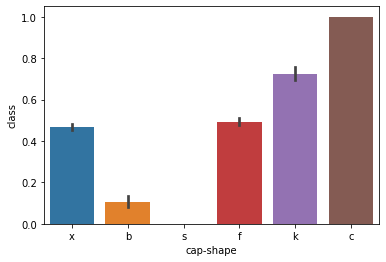

In [10]:
sns.barplot(data=df, y='class', x='cap-shape')
plt.show()

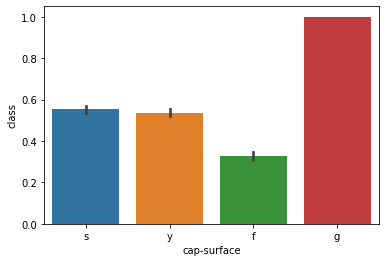

In [11]:
sns.barplot(data=df, y='class', x='cap-surface')
plt.show()

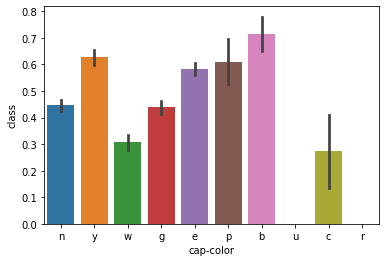

In [12]:
sns.barplot(data=df, y='class', x='cap-color')
plt.show()

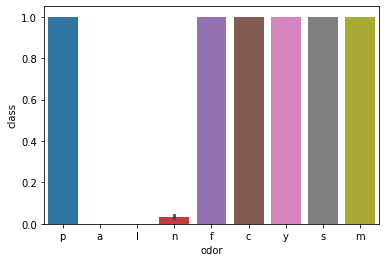

In [13]:
sns.barplot(data=df, y='class', x='odor')
plt.show()

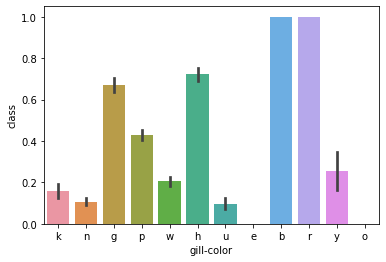

In [14]:
sns.barplot(data=df, y='class', x='gill-color')
plt.show()

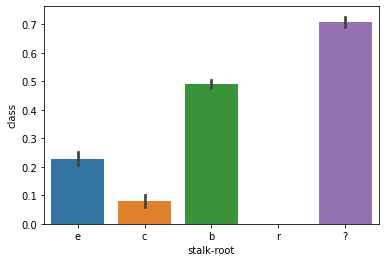

In [15]:
sns.barplot(data=df, y='class', x='stalk-root')
plt.show()

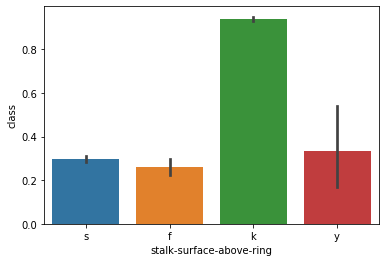

In [16]:
sns.barplot(data=df, y='class', x='stalk-surface-above-ring')
plt.show()

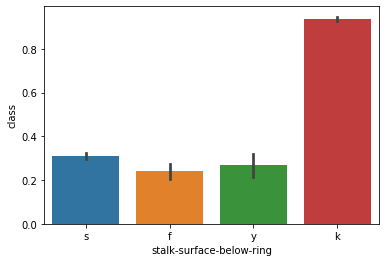

In [17]:
sns.barplot(data=df, y='class', x='stalk-surface-below-ring')
plt.show()

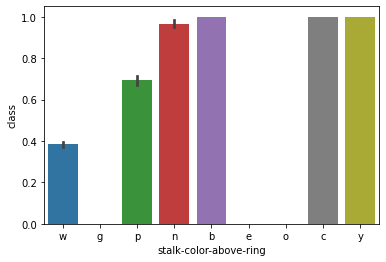

In [18]:
sns.barplot(data=df, y='class', x='stalk-color-above-ring')
plt.show()

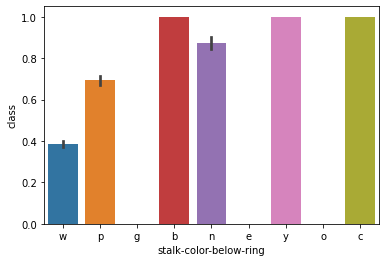

In [19]:
sns.barplot(data=df, y='class', x='stalk-color-below-ring')
plt.show()

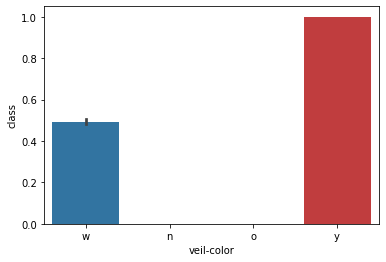

In [20]:
sns.barplot(data=df, y='class', x='veil-color')
plt.show()

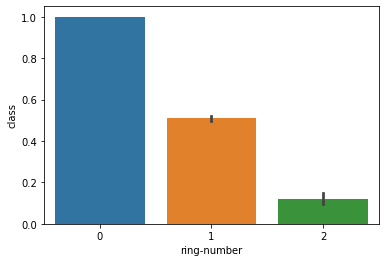

In [21]:
sns.barplot(data=df, y='class', x='ring-number')
plt.show()

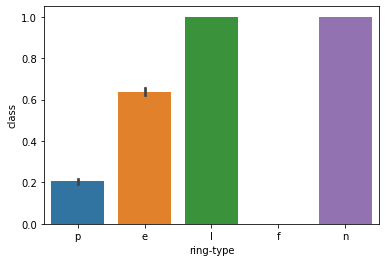

In [22]:
sns.barplot(data=df, y='class', x='ring-type')
plt.show()

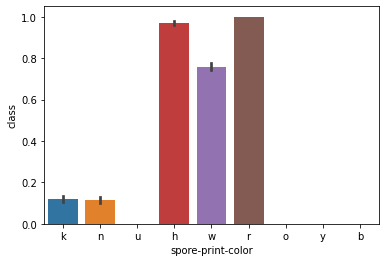

In [23]:
sns.barplot(data=df, y='class', x='spore-print-color')
plt.show()

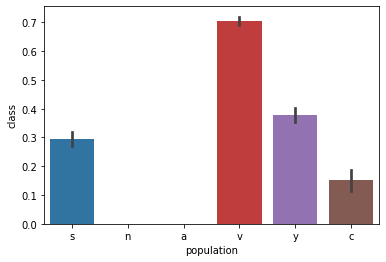

In [24]:
sns.barplot(data=df, y='class', x='population')
plt.show()

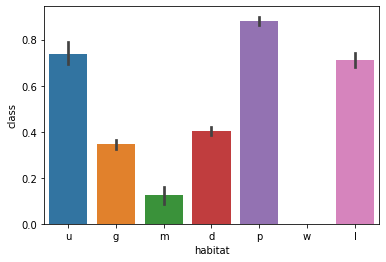

In [25]:
sns.barplot(data=df, y='class', x='habitat')
plt.show()

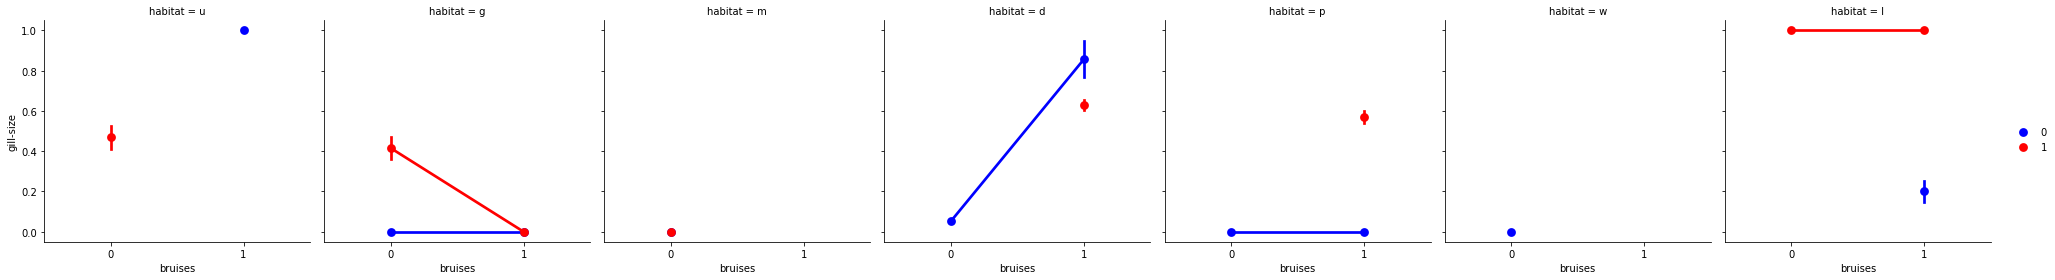

In [26]:
grid = sns.FacetGrid(df, col='habitat', height=4, aspect=1)
grid.map(sns.pointplot, 'bruises', 'gill-size', 'class', palette=['blue', 'red'], order=None, hue_order=None )
grid.add_legend()
plt.show()

К сожалению, выявить ничего больше не удалось. При помощи get_dummies() преобразуем строковые столбцы в фиксированные слобцы индикаторов.

In [27]:
df = pd.get_dummies(df)

In [28]:
df

,class,bruises,gill-spacing,gill-size,stalk-shape,ring-number,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_a,gill-attachment_f,gill-color_b,gill-color_e,gill-color_g,...,stalk-color-below-ring_b,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-color_n,veil-color_o,veil-color_w,veil-color_y,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,0,1,1,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
8120,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
8121,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
8122,1,1,0,1,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0


### Разбиваем дата сет на тестовые и тренировочные данные.

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(df.drop('class', axis=1), df['class'], test_size=0.2, random_state=42)

In [30]:
X_train.shape

(6499, 110)

In [31]:
X_test.shape

(1625, 110)

### Реализуем KNN и сравниваем результаты с работой модуля sklearn.

In [32]:
class KNNClassifier:
  def __init__(self, neighbours = 5):
    self.neighbours = neighbours

  def fit(self, data, labels):
    self.data = data
    self.labels = labels
    self.number_of_labels = len(np.unique(labels))

  def predict(self, item):
    distances = np.sum((item[np.newaxis, :] - self.data[:]) ** 2, axis=1)
    nearest = np.argsort(distances)
    scores = np.zeros(self.number_of_labels)
    for i in range(self.neighbours):
        if distances[nearest[i]] == 0:
          return self.labels[nearest[i]]
        else:
          weight = 1 / distances[nearest[i]]
        scores[self.labels[nearest[i]]] += weight     
    return scores.argmax()    
  

In [33]:
accuracy = []
for i in range(1, 100):
  results = []
  x = KNNClassifier(i)
  x.fit(X_train.to_numpy(), Y_train.to_numpy())
  for j in range(len(Y_test)):
    results.append(x.predict(X_test.iloc[j, :].to_numpy()))
  counter = 0
  for j in range(len(Y_test)):
    if results[j] == Y_test.iloc[j]:
        counter += 1
  accuracy.append(accuracy_score(Y_test, results))     

In [34]:
accuracy

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9993846153846154,
 1.0,
 1.0,
 1.0,
 0.9993846153846154,
 0.9993846153846154,
 0.9993846153846154,
 0.9993846153846154,
 0.9993846153846154,
 0.9993846153846154,
 0.9993846153846154,
 0.9993846153846154,
 0.9993846153846154,
 0.9993846153846154,
 0.9993846153846154,
 0.9993846153846154,
 0.9993846153846154,
 0.9993846153846154,
 0.9993846153846154,
 0.9993846153846154,
 0.9993846153846154,
 0.9993846153846154,
 0.9993846153846154,
 0.9993846153846154,
 0.9993846153846154,
 0.9993846153846154,
 0.9993846153846154,
 0.9993846153846154,
 0.9993846153846154,
 0.9993846153846154,
 0.9993846153846154

In [35]:
accuracy = []
for i in range(2, 100):
  model = KNeighborsClassifier(n_neighbors=i, weights='distance')
  model.fit(X_train, Y_train)
  accuracy.append(model.score(X_test, Y_test))

print(f'Best accuracy for sklearn\'s KNN: {max(accuracy)}')

Best accuracy for sklearn's KNN: 1.0


In [39]:
accuracy

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9993846153846154,
 1.0,
 0.9993846153846154,
 1.0,
 0.9993846153846154,
 0.9993846153846154,
 0.9993846153846154,
 0.9993846153846154,
 0.9993846153846154,
 0.9993846153846154,
 0.9993846153846154,
 0.9993846153846154,
 0.9993846153846154,
 0.9993846153846154,
 0.9993846153846154,
 0.9993846153846154,
 0.9993846153846154,
 0.9993846153846154,
 0.9993846153846154,
 0.9993846153846154,
 0.9993846153846154,
 0.9993846153846154,
 0.9993846153846154,
 0.9993846153846154,
 0.9993846153846154,
 0.9993846153846154,
 0.9993846153846154,
 0.9993846153846154,
 0.9993846153846154,
 0.9993846153846154,
 0.9993846153846154,
 0.9993846153846154,
 0.9993846153846154,
 0.9993846153846154,
 0.9993846153846154,
 0.9993846153846154,
 0.9993846153846154,
 0.9993846153846154

### Реализуем наивный Байесовский классификатор и сравниваем с работой модуля sklearn.

In [36]:
class NaiveBayesClassifier:
    def __init__(self):
        pass

    def get_probabilities(self, class_idx: int, x: np.array) -> np.array:
        mean = self.mean_cond_class[class_idx]
        var = self.var_cond_class[class_idx]
        exponent = np.exp((-1/2) * ((x-mean)**2) / (2 * var))
        probabilities = exponent / np.sqrt(2 * np.pi * var)
        return probabilities

    def get_posterior(self, x: np.array) -> int:
        posteriors = []
        for class_idx in range(self.num_of_classes):
            prior = np.log(self.prior[class_idx])
            conditional = np.sum(np.log(self.get_probabilities(class_idx, x)))
            posterior = prior + conditional
            posteriors.append(posterior)
        return self.classes[np.argmax(posteriors)]

    def fit(self, X_train, Y_train):
        self.classes = np.unique(Y_test)
        self.num_of_classes = len(self.classes)
        
        self.mean_cond_class = X_train.groupby(Y_train).apply(np.mean).to_numpy()
        self.var_cond_class = X_train.groupby(Y_train).apply(np.var).to_numpy()

        self.prior = X_train.groupby(Y_train).apply(lambda col: len(col))
        self.prior = np.array(self.prior / len(Y_train))
        
    def predict(self, X_test):
        Y_pred = [self.get_posterior(f) for f in X_test.to_numpy()]
        return Y_pred
    
    def accuracy_score(self, Y_test, Y_pred):
	    return sum(Y_pred == Y_test) / len(Y_test)

In [37]:
nbc = NaiveBayesClassifier()
nbc.fit(X_train, Y_train)
Y_pred = nbc.predict(X_test)
print(f'Accuracy of custom Naive Bayes: {nbc.accuracy_score(Y_test, Y_pred)}')

Accuracy of custom Naive Bayes: 0.5187692307692308


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


In [38]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.9101538461538462